# Import package

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
# Predictive Model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Imputer
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor
import xgboost 

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Configuration

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Importing data

In [7]:
listings_df = pd.read_csv('C:\\DataScience\\00_AnalysisProjects\\AirbnbAnalysis\\Data\\seattle_listings.csv', sep=',')
listings_df.shape

(3818, 92)

# Data Preparation

## Numerical features

### Convert columns from string to numeric values 

In [8]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'] = listings_df['extra_people'].str.replace("[$, ]", "").astype("float")

### Select numerical features

In [9]:
selected_cols = ['cleaning_fee', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_value', 'review_scores_location',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_rating', 'reviews_per_month', 'bathrooms',
       'bedrooms', 'beds', 'latitude', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'minimum_nights', 'maximum_nights',
       'extra_people', 'calculated_host_listings_count', 'longitude',
       'guests_included', 'accommodates', 'price']

In [10]:
data_df = listings_df.copy(deep=True)
data_df = data_df[selected_cols]
data_df.shape

(3818, 26)

### Dealing with NA values 

Check missing values for each feature

In [11]:
data_df.isnull().sum().sort_values(ascending=False)

cleaning_fee                      1030
review_scores_accuracy             658
review_scores_checkin              658
review_scores_value                656
review_scores_location             655
review_scores_cleanliness          653
review_scores_communication        651
review_scores_rating               647
reviews_per_month                  627
bathrooms                           16
bedrooms                             6
beds                                 1
accommodates                         0
price                                0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
minimum_nights                       0
maximum_nights                       0
extra_people                         0
calculated_host_listings_count       0
longitude                            0
guests_included                      0
latitude                 

Filling mean for NA values for cleaning fee and review features

In [12]:
review_columns = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_value',
                  'review_scores_location', 'review_scores_cleanliness','review_scores_communication',
                  'review_scores_rating','reviews_per_month', 'cleaning_fee']
for col in review_columns:
    data_df[col].fillna(data_df[col].mean(), inplace=True)

data_df.isnull().sum()

Filling mode for bathrooms, bedrooms and beds

In [18]:
na_columns = ['bathrooms','bedrooms','beds']
for col in na_columns:
    data_df[col].fillna(data_df[col].mode()[0], inplace=True)

Recheck missing values for each feature

In [19]:
data_df.isnull().sum()

cleaning_fee                      0
review_scores_accuracy            0
review_scores_checkin             0
review_scores_value               0
review_scores_location            0
review_scores_cleanliness         0
review_scores_communication       0
review_scores_rating              0
reviews_per_month                 0
bathrooms                         0
bedrooms                          0
beds                              0
latitude                          0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
minimum_nights                    0
maximum_nights                    0
extra_people                      0
calculated_host_listings_count    0
longitude                         0
guests_included                   0
accommodates                      0
price                             0
dtype: int64

### Add log_price

In [20]:
data_df['log_price'] = data_df['price'].apply(lambda x:math.log(x))

### Separate features and label

In [21]:
selected_cols = list(data_df.columns.values)
selected_cols = [e for e in selected_cols if e not in ['price','log_price']]
X_data = data_df.loc[:,selected_cols]
Y_data = data_df.loc[:,'log_price']
X_data.shape

(3818, 25)

### Normalization

In [22]:
def Normalize_Data(df):
    for col in df.columns.values:
        df[col] = df[col].astype(float)
        mean = np.mean(df[col])
        std = np.std(df[col])
        df[col] = df[col].apply(lambda x: (x-mean)/std)
    return df

X_data = Normalize_Data(X_data)
X_data.head()

,cleaning_fee,review_scores_accuracy,review_scores_checkin,review_scores_value,review_scores_location,review_scores_cleanliness,review_scores_communication,review_scores_rating,reviews_per_month,bathrooms,bedrooms,beds,latitude,availability_30,availability_60,availability_90,availability_365,number_of_reviews,minimum_nights,maximum_nights,extra_people,calculated_host_listings_count,longitude,guests_included,accommodates
0,-3.031586e-14,5.726658e-01,3.937630e-01,8.023812e-01,-1.063670e+00,6.112031e-01,3.679779e-01,7.654173e-02,1.195309e+00,-0.438461,-0.348068,-0.645342,0.170240,-0.228908,0.179356,0.379264,0.798601,4.897864,-0.083987,-0.246795,-0.322324,-0.160602,-1.194754,0.249756,0.329029
1,-5.204004e-01,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,2.426703e-01,-3.595500e-01,-0.438461,-0.348068,-0.645342,0.236078,-0.311063,-1.020585,-1.235563,0.364696,0.550724,-0.022651,-0.410158,-0.606680,0.518255,-1.025923,-0.513098,0.329029
2,5.711680e+00,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,4.087988e-01,-5.576595e-01,5.500872,4.183643,4.621311,0.017732,-1.296929,-1.320570,-1.206202,-0.195436,-0.058936,0.100020,-0.445801,0.815098,-0.160602,-1.146171,6.352583,3.869138
3,-3.031586e-14,1.119073e-14,-1.049403e-13,1.769432e-13,5.275077e-14,6.363495e-14,-1.304567e-13,-1.487322e-13,-1.439645e-14,-0.438461,-1.480996,0.232433,0.220980,-1.379085,-1.577700,-1.705330,-0.802903,-0.589075,-0.083987,0.204680,-0.606680,-0.330316,-1.139743,-0.513098,-0.176701
4,1.517011e+00,-1.002290e+00,3.937630e-01,-6.624741e-01,-1.063670e+00,-7.666159e-01,3.679779e-01,-4.218439e-01,-7.137458e-01,1.258492,1.917787,1.110209,0.091937,1.085580,0.993601,0.937113,0.948495,0.418189,-0.083987,0.204680,0.246387,-0.330316,-1.240293,3.301169,1.340489


## Add Categorical features

### room_type

In [26]:
room_type = listings_df[['room_type']]
room_dummies = pd.get_dummies(room_type,prefix='roomtype',prefix_sep='_')
room_dummies.head()

,roomtype_Entire home/apt,roomtype_Private room,roomtype_Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
X_data = pd.concat((X_data,room_dummies.astype(int)),axis=1)

# Split data into Training set and Test set

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.3,train_size=0.7,random_state=100)

In [29]:
X_train.shape

(2672, 28)

# Predictive Model

## Multiple Linear Regression

### Linear Regression using stats package

#### Fit the model

In [34]:
# Add constant to data
X = sm.add_constant(X_train)
# Fit the linear model
lr_model = sm.OLS(Y_train, X)
results = lr_model.fit()

#### View the result of the model

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:24:44   Log-Likelihood:                -829.02
No. Observations:                2672   AIC:                             1714.
Df Residuals:                    2644   BIC:                             1879.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3237      0.011    308.309      0.000       3.303       3.345
cleaning_fee                       0.0848      0.009      9.596      0.000       0.067       0.102
review_scores_accuracy             0.0227      0.009      2.546      0.011       0.005       0.040
review_scores_checkin             -0.0276      0.009     -2.947      0.003      -0.046      -0.009
review_scores_value               -0.0648      0.009     -6.864      0.000      -0.083      -0.046
review_scores_location             0.0511      0.007      7.039      0.000       0.037       0.065
review_scores_cleanliness          0.0078      0.009      0.856      0.392      -0.010       0.026
review_scores_communication        0.0145      0.009      1.546      0.122      -0.004       0.033
review_scores_rating               0.0379      0.011      3.396      0.001       0.016       0.060
reviews_per_month                 -0.0550      0.008     -6.750      0.000      -0.071      -0.039
bathrooms                          0.0546      0.008      6.633      0.000       0.038       0.071
bedrooms                           0.1017      0.012      8.433      0.000       0.078       0.125
beds                              -0.0450      0.014     -3.325      0.001      -0.072      -0.018
latitude                          -0.0233      0.007     -3.550      0.000      -0.036      -0.010
availability_30                    0.0192      0.021      0.935      0.350      -0.021       0.060
availability_60                    0.0438      0.043      1.020      0.308      -0.040       0.128
availability_90                   -0.0486      0.033     -1.489      0.137      -0.113       0.015
availability_365                   0.0265      0.009      3.088      0.002       0.010       0.043
number_of_reviews                 -0.0017      0.008     -0.203      0.840      -0.018       0.015
minimum_nights                    -0.0525      0.044     -1.191      0.234      -0.139       0.034
maximum_nights                    -0.0055      0.023     -0.240      0.810      -0.050       0.039
extra_people                       0.0111      0.007      1.606      0.108      -0.002       0.025
calculated_host_listings_count    -0.0271      0.007     -3.727      0.000      -0.041      -0.013
longitude                         -0.0211      0.007     -3.207      0.001      -0.034      -0.008
guests_included                    0.0237      0.008      2.822      0.005       0.007       0.040
accommodates                       0.1334      0.016      8.408      0.000       0.102       0.164
roomtype_Entire home/apt           1.5101      0.013    112.747      0.000       1.484       1.536
roomtype_Private room              1.0772      0.014     78.519      0.000       1.050       1.104
roomtype_Share

### Linear Regression using sklearn package

#### Fit the model

In [49]:
# Choose a class of model
from sklearn.linear_model import LinearRegression
# Choose model hyperparameters
lr_model = LinearRegression(fit_intercept=True)
# Train the model
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Prediction

In [50]:
Y_train_pred = lr_model.predict(X_train)
Y_test_pred = lr_model.predict(X_test)

#### Evaluating Model Accuracy

In [51]:
print('R^2 Train: %.3f, Test: %.3f' % (
        lr_model.score(X_train, Y_train),
        lr_model.score(X_test, Y_test)))
print('RMSE Train: %.3f, Test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)),
        np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))))

R^2 Train: 0.653, Test: 0.616
RMSE Train: 0.330, Test: 0.358


#### Cross Validation

In [40]:
clr_model = LinearRegression(fit_intercept=True)
cv_scores = cross_val_score(lr_model,X_data,Y_data,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(clr_model,X_data, Y_data,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [ 0.75078605  0.68957667  0.66968749  0.39811602  0.52575544  0.50283046
  0.43918393  0.61915471  0.58887069  0.62317457]
Average R2 score:  0.58
Average RMSE score:  0.35


## Gradient Boosting Tree

#### Fit the model

In [41]:
# Choose a class of model
from sklearn.ensemble import GradientBoostingRegressor
# Train model, using default paramenters
gbt_model = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
gbt_model.fit(X_train, Y_train)
# Print Default parameters of the model used
gbt_model.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

#### Predicting label

In [43]:
Y_train_pred = gbt_model.predict(X_train)
Y_test_pred = gbt_model.predict(X_test)

#### Evaluating model accuracy

In [52]:
print('R^2 Train: %.3f, Test: %.3f' % (
        gbt_model.score(X_train, Y_train),
        gbt_model.score(X_test, Y_test)))
print('RMSE Train: %.3f, Test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)),
        np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))))

R^2 Train: 0.785, Test: 0.726
RMSE Train: 0.330, Test: 0.358


#### Cross Validation

In [45]:
cgbt_model = GradientBoostingRegressor(n_estimators = 100)
cv_scores = cross_val_score(cgbt_model,X_data,Y_data,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(cgbt_model,X_data, Y_data,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [ 0.77625834  0.73539758  0.7000007   0.50450005  0.60310357  0.67701347
  0.74112371  0.66633235  0.65951682  0.67000645]
Average R2 score:  0.67
Average RMSE score:  0.31


#### Tuning model

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [3, 20],
    'max_features': [2, 25],
    'min_samples_leaf': [2, 20],
    'min_samples_split': [2, 20],
    'n_estimators': [100, 500]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbt_model, param_grid = param_grid, cv = 10, n_jobs = 1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)    

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV]  max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_e

[CV]  max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.7s
[CV] max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.7s
[CV] max_depth=3, max_features=25, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=3, max_features=25, min_samples_leaf=30, min_samples_sp

[CV]  max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=20, max_features=2, min_samples_leaf=30, min_samples_sp

[CV]  max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   4.1s
[CV] max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   3.7s
[CV] max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   3.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   3.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=1, min_samples_sp

[CV]  max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=100, total=   0.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   4.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   4.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   5.2s
[CV] max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=25, min_samples_leaf=30, min_samples_split=2, n_estimators=500, total=   4.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=30, min_

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 20], 'max_features': [2, 25], 'min_samples_leaf': [1, 30], 'min_samples_split': [2, 30], 'n_estimators': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [76]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 30,
 'min_samples_split': 30,
 'n_estimators': 100}

In [95]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    # Retrain with the best parameters
    gbt_model = GradientBoostingRegressor(n_estimators = 500,learning_rate=learning_rate, random_state = 42, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)
    gbt_model.fit(X_train, Y_train)
    # Predicting label
    Y_train_pred = gbt_model.predict(X_train)
    Y_test_pred = gbt_model.predict(X_test)
    # Evaluating Model Accuracy 
    print('Learning rate: %.3f, Train: %.3f, Test: %.3f' % (learning_rate,gbt_model.score(X_train, Y_train),gbt_model.score(X_test, Y_test)))

Learning rate: 0.050, Train: 0.795, Test: 0.730
Learning rate: 0.100, Train: 0.830, Test: 0.730
Learning rate: 0.250, Train: 0.881, Test: 0.710
Learning rate: 0.500, Train: 0.919, Test: 0.690
Learning rate: 0.750, Train: 0.938, Test: 0.634
Learning rate: 1.000, Train: 0.954, Test: 0.581


In [96]:
# Retrain model, using the best paramenters
gbt_model = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.05,random_state = 42, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)

In [97]:
gbt_model.fit(X_train, Y_train)
# Predicting label
Y_train_pred = gbt_model.predict(X_train)
Y_test_pred = gbt_model.predict(X_test)
# Evaluating model accuracy
print('R^2 Train: %.3f, Test: %.3f' % (
        gbt_model.score(X_train, Y_train),
        gbt_model.score(X_test, Y_test)))
print('RMSE Train: %.3f, Test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)),
        np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))))

R^2 Train: 0.795, Test: 0.730
RMSE Train: 0.253, Test: 0.300


In [98]:
# Cross Validation
gbt_model = GradientBoostingRegressor(n_estimators = 500,learning_rate=0.05, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)
cv_scores = cross_val_score(gbt_model,X_data,Y_data,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(gbt_model,X_data, Y_data,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [ 0.78799017  0.75791602  0.71300678  0.51148863  0.61221544  0.69034223
  0.75567406  0.68765541  0.66008486  0.68659336]
Average R2 score:  0.69
Average RMSE score:  0.3


### XGBoost

#### Train the model

In [53]:
# Choose a class of model
import xgboost 
# Train model, using default paramenters
xgb_model = xgboost.XGBRegressor(n_estimators = 100)
xgb_model.fit(X_train, Y_train)
# Print Default parameters of the model used
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

#### Predicting

In [54]:
Y_train_pred = xgb_model.predict(X_train)
Y_test_pred = xgb_model.predict(X_test)

#### Evaluating model accuracy

In [55]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, Y_train_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print('R^2 train 1: %.3f, test: %.3f' % (
        r2_score(Y_train, Y_train_pred),
        r2_score(Y_test, Y_test_pred)))
print('R^2 train 2: %.3f, test: %.3f' % (
        xgb_model.score(X_train, Y_train),
        xgb_model.score(X_test, Y_test)))

MSE train: 0.069, test: 0.093
R^2 train 1: 0.779, test: 0.721
R^2 train 2: 0.779, test: 0.721


#### Cross Validation

In [56]:
cxgb_model = xgboost.XGBRegressor(n_estimators = 100)
cv_scores = cross_val_score(cxgb_model,X_data,Y_data,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(cxgb_model,X_data, Y_data,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [ 0.78083357  0.74263535  0.69330163  0.51472412  0.61109405  0.68843936
  0.73947753  0.65889818  0.65739508  0.66629175]
Average R2 score:  0.68
Average RMSE score:  0.31


#### Tuning Model

In [81]:
xgb_model = xgboost.XGBRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [3, 20],
    'max_features': [2, 25],
    'min_samples_leaf': [2, 20],
    'min_samples_split': [2, 20],
    'n_estimators': [100, 500]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv = 10, n_jobs = 1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV]  max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=20, min_samples_split=2, n_e

[CV]  max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=2, min_samples_split=2, n_e

[CV]  max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=25, min_samples_leaf=20, min_samples_sp

[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_e

[CV]  max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=20, min_samples_sp

[CV]  max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=2, min_samples_sp

[CV]  max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=25, min_samples_leaf=20, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=20, max_features=25, min_samples_leaf=20, min_

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  9.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 20], 'max_features': [2, 25], 'min_samples_leaf': [2, 20], 'min_samples_split': [2, 20], 'n_estimators': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [82]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [99]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    # Retrain with the best parameters
    xgb_model = xgboost.XGBRegressor(n_estimators=500,learning_rate=learning_rate,max_depth=3,max_features=2,min_samples_leaf=2,min_samples_split=2,random_state=42)
    xgb_model.fit(X_train, Y_train)
    # Predicting label
    Y_train_pred = xgb_model.predict(X_train)
    Y_test_pred = xgb_model.predict(X_test)
    # Evaluating Model Accuracy 
    print('Learning rate: %.3f, Train: %.3f, Test: %.3f' % (learning_rate,xgb_model.score(X_train, Y_train),xgb_model.score(X_test, Y_test)))

Learning rate: 0.050, Train: 0.836, Test: 0.729
Learning rate: 0.100, Train: 0.884, Test: 0.721
Learning rate: 0.250, Train: 0.947, Test: 0.714
Learning rate: 0.500, Train: 0.982, Test: 0.667
Learning rate: 0.750, Train: 0.992, Test: 0.612
Learning rate: 1.000, Train: 0.996, Test: 0.555


In [100]:
xgb_model = xgboost.XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=3,max_features=2,min_samples_leaf=2,min_samples_split=2,random_state=42)
xgb_model.fit(X_train, Y_train)
# Predicting label
Y_train_pred = xgb_model.predict(X_train)
Y_test_pred = xgb_model.predict(X_test)
# Evaluating model accuracy
print('R^2 Train: %.3f, Test: %.3f' % (
        xgb_model.score(X_train, Y_train),
        xgb_model.score(X_test, Y_test)))
print('RMSE Train: %.3f, Test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)),
        np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))))

R^2 Train: 0.836, Test: 0.729
RMSE Train: 0.227, Test: 0.300


In [101]:
xgb_model = xgboost.XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=3,max_features=2,min_samples_leaf=2,min_samples_split=2)
cv_scores = cross_val_score(xgb_model,X_data,Y_data,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(xgb_model,X_data, Y_data,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [ 0.78291997  0.74445229  0.70700805  0.49908502  0.61263611  0.69330168
  0.75252745  0.67776206  0.65657715  0.68839144]
Average R2 score:  0.68
Average RMSE score:  0.31


# Random Forest

#### Train the model

In [57]:
# Choose a class of model
from sklearn.ensemble import RandomForestRegressor 
# Train model, using default paramenters
rf_model = RandomForestRegressor(n_estimators = 100, random_state=42)
rf_model.fit(X_train, Y_train)
# Print Default parameters of the model used
rf_model.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Predicting

In [58]:
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)

#### Evaluating model accuracy

In [59]:
print('R^2 Train: %.3f, Test: %.3f' % (
        rf_model.score(X_train, Y_train),
        rf_model.score(X_test, Y_test)))
print('RMSE Train: %.3f, Test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)),
        np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))))

R^2 Train: 0.958, Test: 0.724
RMSE Train: 0.115, Test: 0.303


#### Cross Validation

In [60]:
crf_model = xgboost.XGBRegressor(n_estimators = 100)
cv_scores = cross_val_score(crf_model,X_data,Y_data,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(crf_model,X_data, Y_data,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [ 0.78083357  0.74263535  0.69330163  0.51472412  0.61109405  0.68843936
  0.73947753  0.65889818  0.65739508  0.66629175]
Average R2 score:  0.68
Average RMSE score:  0.31


## Regularization - Ridge Regression

#### Train model

In [105]:
# Grid search
ridge = Ridge()
ridge_param = {'alpha':[0.1, 0.5, 1.0,5.0, 10.0,15,20]}
ridge_grid = GridSearchCV(ridge, ridge_param, cv = 10, verbose=10, scoring = 'neg_mean_absolute_error')
ridge_grid.fit(X_train, Y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] alpha=0.1 .......................................................
[CV] ............ alpha=0.1, score=-0.24544034069176904, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............. alpha=0.1, score=-0.2823877521860509, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............. alpha=0.1, score=-0.2556151350070213, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............. alpha=0.1, score=-0.2481966024466367, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............. alpha=0.1, score=-0.2624326343613733, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............ alpha=0.1, score=-0.24698038959716115, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ........... alpha=10.0, score=-0.27080790005546224, total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] ........... alpha=10.0, score=-0.25924052497874095, total=   0.0s
[CV] alpha=15 ........................................................
[CV] ............. alpha=15, score=-0.24468912047627228, total=   0.0s
[CV] alpha=15 ........................................................
[CV] ............. alpha=15, score=-0.28420549291632313, total=   0.0s
[CV] alpha=15 ........................................................
[CV] .............. alpha=15, score=-0.2562189511354383, total=   0.0s
[CV] alpha=15 ........................................................
[CV] ............. alpha=15, score=-0.24727118012793584, total=   0.0s
[CV] alpha=15 ........................................................
[CV] ............. alpha=15, score=-0.26227661959677456, total=   0.0s
[CV] alpha=15 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.2s finished


In [107]:
ridge_score = ridge_grid.best_score_
ridge_score

-0.25777694888887498

#### Cross Validation

In [104]:
from sklearn.linear_model import Ridge,Lasso 
reg = linear_model.RidgeCV(alphas=[0.1, 0.5, 1.0,5.0, 10.0,15,20], cv=10)
reg.fit(X_train, Y_train)       
reg.alpha_  

5.0

## Regularization - Train many models at the same time

#### Train model

In [115]:
from sklearn.linear_model import  Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV 
Model_List = [Lasso, Ridge]

In [119]:
alphas = [0.1, 0.5, 1.0,5.0, 10.0,15,20]

In [117]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

In [112]:
alphas = np.logspace(-3, -1, 20)
alphas

array([ 0.001     ,  0.00127427,  0.00162378,  0.00206914,  0.00263665,
        0.00335982,  0.00428133,  0.00545559,  0.00695193,  0.00885867,
        0.01128838,  0.0143845 ,  0.01832981,  0.02335721,  0.02976351,
        0.0379269 ,  0.0483293 ,  0.06158482,  0.078476  ,  0.1       ])

In [113]:
def Regression_CV(X_data, Y_data, Model_List, alphas):      
    for Model in Model_List:
        scores = [cross_val_score(Model(alpha), X_data, Y_data, cv=5).mean() for alpha in alphas]
        rmse= [np.sqrt(-cross_val_score(Model(alpha), X_data, Y_data, cv=5, scoring="neg_mean_squared_error")).mean() for alpha in alphas]
        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        plt.plot(alphas, scores, label=Model.__name__)
        plt.legend(loc='lower left')
        plt.xlabel('alpha')
        plt.ylabel('cross validation score')
        plt.subplot(122)
        cv_ridge = pd.Series(rmse, index = alphas)
        cv_ridge.plot(title = "Validation - Just Do It")
        plt.xlabel("alpha")
        plt.ylabel("rmse")

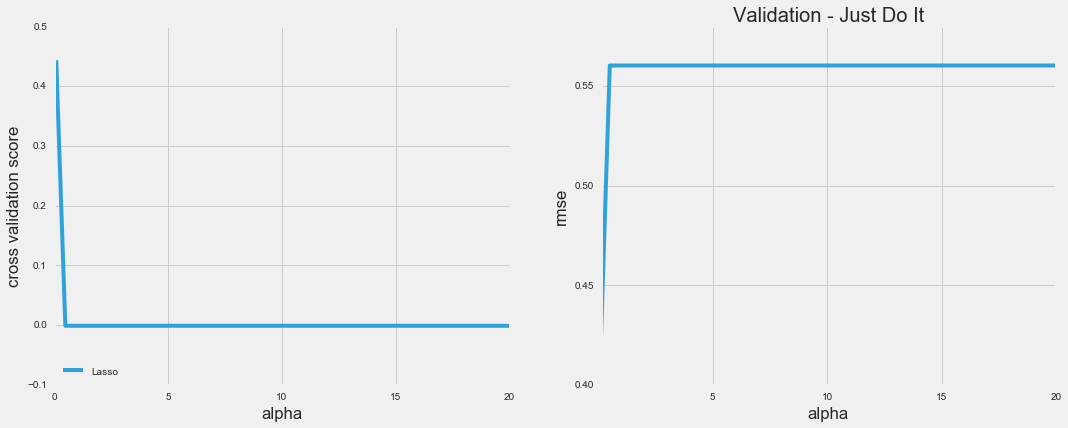

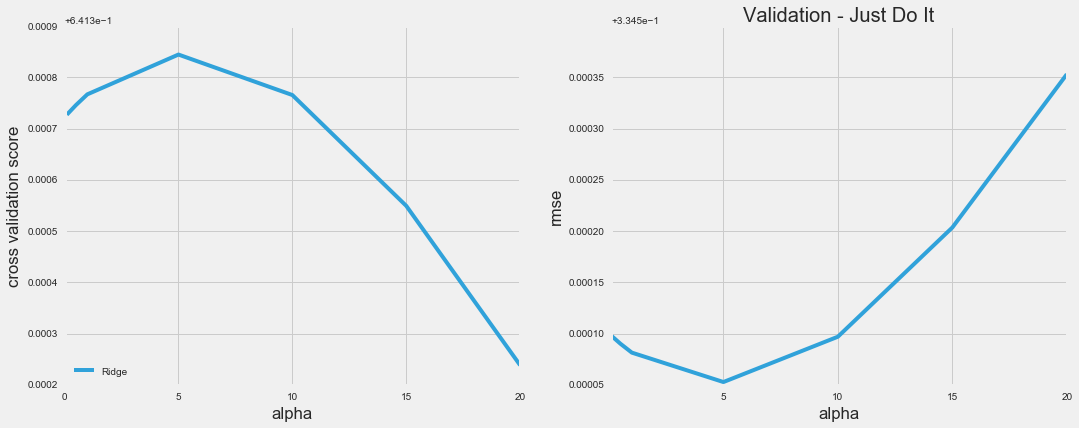

In [120]:
Regression_CV(X_train, Y_train, Model_List,alphas)

## PCA

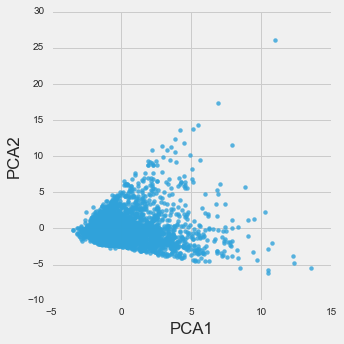

In [121]:
X_train.columns.values   
   
from sklearn.decomposition import PCA  # 1. Choose the model class
PCA_model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCA_model.fit(X_data)                      # 3. Fit to data. Notice y is not specified!
X_2D = PCA_model.transform(X_data)         # 4. Transform the data to two dimensions

PCA_df = pd.DataFrame()
PCA_df['PCA1'] = X_2D[:, 0]
PCA_df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", data=PCA_df, fit_reg=False);
plt.show()

### PCA using ONE HOT encoding

In [145]:
X_std.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [146]:
# split data into features and label
X_data = data_df.loc[:,selected_cols]
X_data['roomtype_Entire home/apt'] = room_dummies['roomtype_Entire home/apt']
X_data['roomtype_Private room'] = room_dummies['roomtype_Private room']
X_data['roomtype_Shared room'] = room_dummies['roomtype_Shared room']
Y_data = data_df.loc[:,'price']
# standardize the dataset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_data)
# call PCA
pca = PCA(n_components = 28)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
print('Components:\n', pca.components_)

Components:
 [[  3.20488235e-01  -3.68427697e-02  -3.41190731e-02  -4.30511993e-02
   -1.09920754e-02  -1.73266538e-02  -3.30315029e-02  -2.55338216e-02
   -1.32092027e-01   2.86377213e-01   3.75078653e-01   3.87118370e-01
    1.82662190e-02  -1.37101018e-01  -1.49764947e-01  -1.54607193e-01
   -1.00844166e-01  -9.36400306e-02   1.07822606e-02   1.40672704e-03
    9.87741545e-02  -1.78101415e-02  -4.28660446e-02   2.73197367e-01
    4.10214871e-01   2.88807814e-01  -2.70993957e-01  -6.74699341e-02]
 [  3.37731759e-02  -3.58758130e-01  -3.39302181e-01  -3.80506488e-01
   -2.40486681e-01  -3.47103158e-01  -3.48219191e-01  -4.10617380e-01
   -9.49910506e-02  -3.37754892e-03  -6.05058585e-03   1.19944242e-02
    7.35770941e-03   1.54941736e-01   1.57670345e-01   1.52071293e-01
    1.22599632e-01  -4.65424003e-02   1.03289199e-02   2.51003020e-02
    2.79345483e-02   1.80313305e-01   5.23231366e-02  -1.28431138e-02
    8.82338458e-03  -3.59572841e-02   9.85331684e-03   7.21382891e-02]
 [ -1

In [148]:
print('Explained Variance Ratio:\n ',pca.explained_variance_ratio_)

Explained Variance Ratio:
  [  1.61911147e-01   1.43383591e-01   1.14771074e-01   5.86620709e-02
   5.54014888e-02   4.52255991e-02   4.20401665e-02   3.99652367e-02
   3.60207371e-02   3.54011851e-02   3.20232135e-02   3.00783054e-02
   2.64669170e-02   2.38570314e-02   2.15889680e-02   1.86872345e-02
   1.64374438e-02   1.62002800e-02   1.57347515e-02   1.49946402e-02
   1.41439828e-02   1.09246767e-02   9.23382619e-03   8.00073612e-03
   4.32617174e-03   4.03602668e-03   4.83499560e-04   3.19313434e-32]


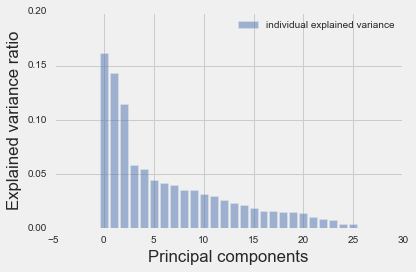

In [149]:
#plot explained variance 
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 0.2)
plt.legend(loc = 'best')
plt.tight_layout()

In [150]:
s1 = sum(pca.explained_variance_ratio_[:17])
s2 = sum(pca.explained_variance_ratio_[17:])

In [151]:
# dimensionality reduction, keeping only
# 17 principal component
pca = PCA(n_components = 17)
X_pca = pca.fit_transform(X_std)
# inverse transform to obtain the projected data
X_new = pca.inverse_transform(X_pca)

In [153]:
print("Percentage of information on the components that we keep:",s1,"\nPercentage of information of the components that we discard:",s2)
print("original shape:   ", X_data.shape)
print("transformed shape:", X_pca.shape)

Percentage of information on the components that we keep: 0.901921408523 
Percentage of information of the components that we discard: 0.0980785914766
original shape:    (3818, 28)
transformed shape: (3818, 17)


#### Linear Regression with/without PCA (one hot encoding)

In [158]:
import time
from sklearn.pipeline import Pipeline

X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                Y_data, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=42)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 17)),
    ('linear', linear_model.LinearRegression())
])
pipe1.fit(X_train, Y_train)
Y_pred1 = pipe1.predict(X_test)

linear_reg_error1 = metrics.median_absolute_error(Y_test, Y_pred1) 

# pipeline without PCA
pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('linear', linear_model.LinearRegression())
])
start = time.time()
pipe2.fit(X_train, Y_train)
Y_pred2 = pipe2.predict(X_test)

linear_reg_error2 = metrics.median_absolute_error(Y_test, Y_pred2) 

In [159]:
print ("Linear Regression deviation with PCA: " + str(linear_reg_error1))
print ("Linear Regression deviation without PCA: " + str(linear_reg_error2))

Linear Regression deviation with PCA: 25.7608335724
Linear Regression deviation without PCA: 24.8976836905


In [160]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R-squared Error with PCA:",r2_score(Y_test,Y_pred1))
print("R-squared Error without PCA:",r2_score(Y_test,Y_pred2))

R-squared Error with PCA: 0.569436267154
R-squared Error without PCA: 0.578446620987


### PCA using Label encoding

In [161]:
pca = PCA(n_components =5)
pca.fit(X_std)

# important information
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 0.32048093 -0.03684252 -0.03412333 -0.04304509 -0.01098882 -0.01733318
  -0.03303338 -0.02553367 -0.13209452  0.28637637  0.37508021  0.38711994
   0.01826133 -0.13710453 -0.14976688 -0.15460787 -0.10083211 -0.09363913
   0.01078327  0.00140473  0.09876765 -0.01781691 -0.04286798  0.27320197
   0.41021646  0.28880786 -0.27099472 -0.06746802]
 [ 0.03378933 -0.35876688 -0.33928606 -0.38053063 -0.24049641 -0.34706392
  -0.34821495 -0.41061955 -0.09497105 -0.00338486 -0.00605761  0.01199494
   0.00737714  0.15495546  0.15767888  0.15207493  0.12254761 -0.04655861
   0.01032231  0.02510787  0.02794872  0.18035616  0.05232905 -0.01284462
   0.00882401 -0.03595967  0.00986094  0.07212448]
 [-0.15467857 -0.10569138 -0.11125558 -0.08947571 -0.05635367 -0.14479558
  -0.11202598 -0.13324215 -0.05474761 -0.11987982 -0.12424524 -0.15395041
   0.01995914 -0.45587547 -0.47841323 -0.47479814 -0.35400702 -0.07642707
  -0.00681411  0.01392728 -0.05923072 -0.04063312  0.03570685 -0.10360

In [162]:
s1 = sum(pca.explained_variance_ratio_[:3])
s2 = sum(pca.explained_variance_ratio_[3:])

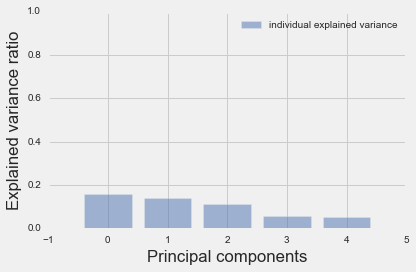

In [163]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1)
plt.legend(loc = 'best')
plt.tight_layout()

In [164]:


# dimensionality reduction, keeping only
# the first principal component
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_std)

# inverse transform to obtain the projected data
# and compare with the original
X_new = pca.inverse_transform(X_pca)

In [165]:
print("original shape:   ", X_data.shape)
print("transformed shape:", X_pca.shape)
print("Percentage of information on the components that we keep:",s1,"\nPercentage of information of the components that we discard:",s2)

original shape:    (3818, 28)
transformed shape: (3818, 3)
Percentage of information on the components that we keep: 0.420065788977 
Percentage of information of the components that we discard: 0.114057110741


Linear Regression with/without PCA (label encoding)

In [167]:
import time

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                Y_data, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=13)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 4)),
    ('linear', linear_model.LinearRegression())
])
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

linear_reg_error1 = metrics.median_absolute_error(y_test, pipe1.predict(X_test)) 

# pipeline without PCA

pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('linear', linear_model.LinearRegression())
])
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

linear_reg_error2 = metrics.median_absolute_error(y_test, pipe2.predict(X_test)) 

In [168]:
print ("Linear Regression deviation with PCA: " + str(linear_reg_error1))
print ("Linear Regression deviation without PCA: " + str(linear_reg_error2))

Linear Regression deviation with PCA: 24.7968440563
Linear Regression deviation without PCA: 22.9306640625


In [169]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R-squared Error with PCA:",r2_score(y_test,y_pred1))
print("R-squared Error without PCA:",r2_score(y_test,y_pred2))

R-squared Error with PCA: 0.538978277855
R-squared Error without PCA: 0.572496083371
